In [1]:
%reset -f
from A_Functions import *

In [2]:
# Create Noise Type
# Give a name for your noise - be precise to make it easy to detect what type it is
# Example 'NoiseConst_2nA' or 'NoiseDS_2A10Hz_9A1Hz'
namenoise = '2Hz_20Hz_60ssaturation'

# extra step to make a new file with the same name only with 'SimParams.mat' added
#simparameter=list(namenoise)
#simparameter.append('_SimParams.mat')
#simparameter="".join(simparameter)

## input of NoiseGenerator for double sine is :
# (amount of noise sources, 'DS', [offset sine1,offset sine2,amplitude sine1 (nA), frequency sine1(Hz),,
#amplitude sine2, frequency sine2], duration in ms, name of the file)

## input of NoiseGenerator for OU is :
# (amount of noise sources, 'OU', [initial I, initial I0, sigma], duration in ms, name of the file)

## input of NoiseGenerator Constant value :
# (amount, 'const',[constant value in nA], duration in ms, name of the file)

Noise_t,Noise_I,N_Noise=NoiseGenerator(2,'DS',[0.2,0.2    # offset in nA
                                               ,0.2,0.2 # amplitude in nA
                                               ,2,20   # frequency in Hz
                                              ],60000,namenoise)

#Noise_t,Noise_I,N_Noise=NoiseGenerator(5,'DS',[1 ,0.5, 0, -0.5, -1,     #offsets in nA
#                                              1, 0.5, 0, 0.5, 1, #amplitude in nA
#                                              20, 2, 2, 20, 2]         # frequency in Hz
#                                              ,2500,namenoise,simparameter)

#Noise_const15 = NoiseGenerator(2,'const',[1.5],10,'Noise_const15')


Noise input is of type double sine
Data is saved


In [3]:
SimParams = {}
######################## Save
SimParams['saving'] = 'yes' #'yes','no'
######################## plot
SimParams['plotting'] = 'yes' #'yes','no'
######################## Experiment length
SimParams['dt'] = 0.025*ms
SimParams['exp_runtime'] = asarray(size(Noise_t)*SimParams['dt'])
#print(type(SimParams['exp_runtime']*second))
######################## Neuronal responses to run. 
SimParams['IO_response']='both' #'oscillatory', 'non', 'spiking', 'both' 
SimParams['N_Cells_PC'] = 10
SimParams['N_Cells_DCN'] = 20
SimParams['N_Cells_IO'] = 20
name = namenoise+'SimParam.pickle'
print(SimParams)
######################## Saving SimParams
with open(name, 'wb') as sims:
    pickle.dump(SimParams,sims, pickle.HIGHEST_PROTOCOL)
#sio.savemat('SimParams.mat', mdict={'SimParams': SimParams})


{'saving': 'yes', 'plotting': 'yes', 'dt': 25. * usecond, 'exp_runtime': array(60.), 'IO_response': 'both', 'N_Cells_PC': 10, 'N_Cells_DCN': 20, 'N_Cells_IO': 20}


In [4]:
#from E_Synapses_NoPlasticity import *
from E_New_Plasticity import *
#visualise(S_Coupled_noSTDP)
#visualise(DCN_PC_Synapse_Coupled_noSTDP)
#visualise(DCN_PC_Synapse_Uncoupled_noSTD

loading went fine
intrinsic current coupled = <PC_Coupled_STDP.I_intrinsic: array([1.94, 1.96, 1.98, 1.9 , 2.04, 1.92, 2.02, 2.  , 2.08, 2.06]) * namp>
intrinsic current uncoupled = <PC_Uncoupled_STDP.I_intrinsic: array([1.94, 1.96, 1.98, 1.9 , 2.04, 1.92, 2.02, 2.  , 2.08, 2.06]) * namp>
t_learn = 5
number of IO 20
nr of noise is 2
offset [0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2
 0.2 0.2] ampl [0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2
 0.2 0.2] freq [ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2. 20. 20. 20. 20. 20. 20. 20. 20.
 20. 20.]


WARNING    The expression "(conn_target - noise_source) / N_Cells_PC" divides two integer values. In previous versions of Brian, this would have used either an integer ("flooring") or a floating point division, depending on the Python version and the code generation target. In the current version, it always uses a floating point division. Explicitly ask for an  integer division ("//"), or turn one of the operands into a floating point value (e.g. replace "1/2" by "1.0/2") to no longer receive this warning. [brian2.parsing.bast.floating_point_division]


<dummy_Coupled.weight: array([1. , 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.9, 1. , 0.9,
       0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2])>
new weights <dummy_Coupled.weight: array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5])>
offset [0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2
 0.2 0.2] ampl [0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2
 0.2 0.2] freq [ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2. 20. 20. 20. 20. 20. 20. 20. 20.
 20. 20.]


In [5]:
run(exp_runtime,report='text')

Starting simulation at t=0. s for a duration of 60. s
0.38835 s (0%) simulated in 10s, estimated 25m 35s remaining.
0.7412 s (1%) simulated in 20s, estimated 26m 39s remaining.
1.038875 s (1%) simulated in 30s, estimated 28m 23s remaining.
1.190025 s (1%) simulated in 40s, estimated 32m 58s remaining.
1.343025 s (2%) simulated in 50s, estimated 36m 25s remaining.
1.4945 s (2%) simulated in 1m 0s, estimated 39m 10s remaining.
1.63165 s (2%) simulated in 1m 10s, estimated 41m 45s remaining.
1.7729 s (2%) simulated in 1m 20s, estimated 43m 48s remaining.
1.913025 s (3%) simulated in 1m 30s, estimated 45m 34s remaining.
2.056025 s (3%) simulated in 1m 40s, estimated 47m 0s remaining.
2.199025 s (3%) simulated in 1m 50s, estimated 48m 14s remaining.
2.344025 s (3%) simulated in 2m 0s, estimated 49m 14s remaining.
2.488025 s (4%) simulated in 2m 10s, estimated 50m 8s remaining.
2.630675 s (4%) simulated in 2m 20s, estimated 50m 56s remaining.
2.775025 s (4%) simulated in 2m 30s, estimated 51

17.595025 s (29%) simulated in 20m 31s, estimated 49m 29s remaining.
17.726025 s (29%) simulated in 20m 41s, estimated 49m 22s remaining.
17.86065 s (29%) simulated in 20m 51s, estimated 49m 14s remaining.
17.992025 s (29%) simulated in 21m 1s, estimated 49m 6s remaining.
18.120025 s (30%) simulated in 21m 11s, estimated 49m 0s remaining.
18.253025 s (30%) simulated in 21m 21s, estimated 48m 52s remaining.
18.38515 s (30%) simulated in 21m 31s, estimated 48m 44s remaining.
18.517175 s (30%) simulated in 21m 41s, estimated 48m 37s remaining.
18.650025 s (31%) simulated in 21m 51s, estimated 48m 29s remaining.
18.783025 s (31%) simulated in 22m 1s, estimated 48m 21s remaining.
18.916025 s (31%) simulated in 22m 12s, estimated 48m 13s remaining.
19.049025 s (31%) simulated in 22m 22s, estimated 48m 5s remaining.
19.182575 s (31%) simulated in 22m 32s, estimated 47m 57s remaining.
19.31405 s (32%) simulated in 22m 42s, estimated 47m 49s remaining.
19.445025 s (32%) simulated in 22m 52s, es

32.766025 s (54%) simulated in 40m 34s, estimated 33m 43s remaining.
32.88425 s (54%) simulated in 40m 44s, estimated 33m 35s remaining.
33.00385 s (55%) simulated in 40m 54s, estimated 33m 27s remaining.
33.12275 s (55%) simulated in 41m 4s, estimated 33m 19s remaining.
33.242025 s (55%) simulated in 41m 14s, estimated 33m 12s remaining.
33.361025 s (55%) simulated in 41m 24s, estimated 33m 4s remaining.
33.479325 s (55%) simulated in 41m 34s, estimated 32m 56s remaining.
33.598025 s (55%) simulated in 41m 44s, estimated 32m 48s remaining.
33.717025 s (56%) simulated in 41m 54s, estimated 32m 40s remaining.
33.837025 s (56%) simulated in 42m 4s, estimated 32m 32s remaining.
33.956025 s (56%) simulated in 42m 14s, estimated 32m 24s remaining.
34.075025 s (56%) simulated in 42m 24s, estimated 32m 16s remaining.
34.194025 s (56%) simulated in 42m 34s, estimated 32m 8s remaining.
34.313025 s (57%) simulated in 42m 44s, estimated 32m 0s remaining.
34.4312 s (57%) simulated in 42m 54s, esti

46.556025 s (77%) simulated in 1h 0m 36s, estimated 17m 30s remaining.
46.666025 s (77%) simulated in 1h 0m 46s, estimated 17m 22s remaining.
46.7765 s (77%) simulated in 1h 0m 56s, estimated 17m 14s remaining.
46.886025 s (78%) simulated in 1h 1m 7s, estimated 17m 6s remaining.
46.995125 s (78%) simulated in 1h 1m 17s, estimated 16m 58s remaining.
47.105625 s (78%) simulated in 1h 1m 27s, estimated 16m 49s remaining.
47.215025 s (78%) simulated in 1h 1m 37s, estimated 16m 41s remaining.
47.325025 s (78%) simulated in 1h 1m 47s, estimated 16m 33s remaining.
47.434025 s (79%) simulated in 1h 1m 57s, estimated 16m 25s remaining.
47.54375 s (79%) simulated in 1h 2m 7s, estimated 16m 16s remaining.
47.653025 s (79%) simulated in 1h 2m 17s, estimated 16m 8s remaining.
47.762025 s (79%) simulated in 1h 2m 27s, estimated 16m 0s remaining.
47.871025 s (79%) simulated in 1h 2m 37s, estimated 15m 52s remaining.
47.981025 s (79%) simulated in 1h 2m 47s, estimated 15m 44s remaining.
48.089025 s (8

59.399025 s (98%) simulated in 1h 20m 9s, estimated 49s remaining.
59.508025 s (99%) simulated in 1h 20m 19s, estimated 40s remaining.
59.602025 s (99%) simulated in 1h 20m 29s, estimated 32s remaining.
59.668025 s (99%) simulated in 1h 20m 40s, estimated 27s remaining.
59.743025 s (99%) simulated in 1h 20m 50s, estimated 21s remaining.
59.819275 s (99%) simulated in 1h 21m 0s, estimated 15s remaining.
59.900025 s (99%) simulated in 1h 21m 10s, estimated 8s remaining.
59.985025 s (99%) simulated in 1h 21m 20s, estimated 1s remaining.
60. s (100%) simulated in 1h 21m 21s


In [6]:
#run(exp_runtime,report='text')

['frequency =2', 'frequency =20']


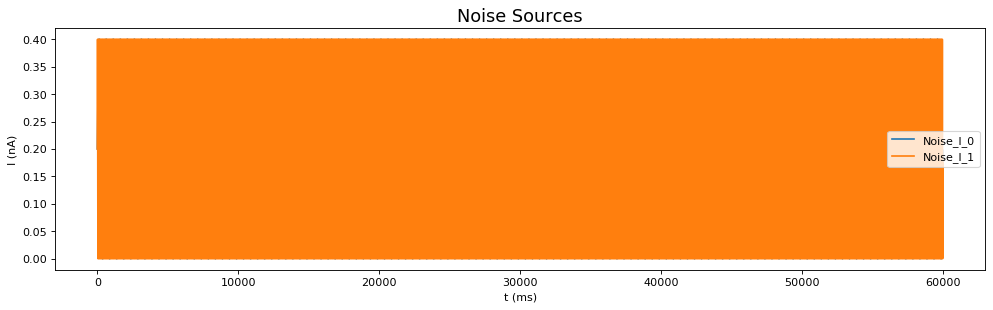

Plasticity


WARNING    C:\Users\thoed\Anaconda3\envs\brian\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
 [py.warnings]


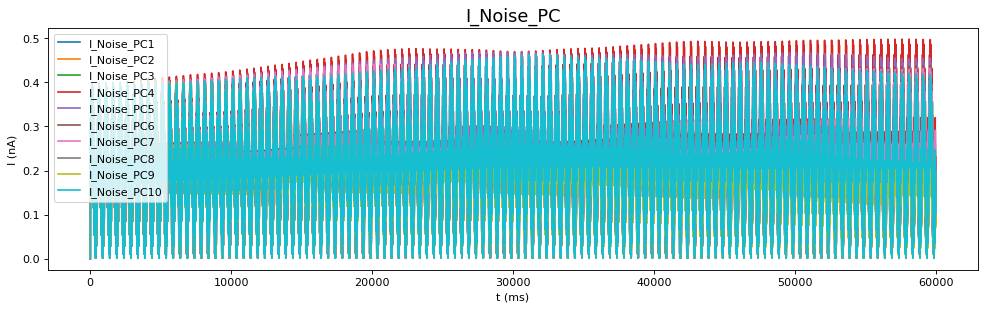

Plasticity Coupled Scenario


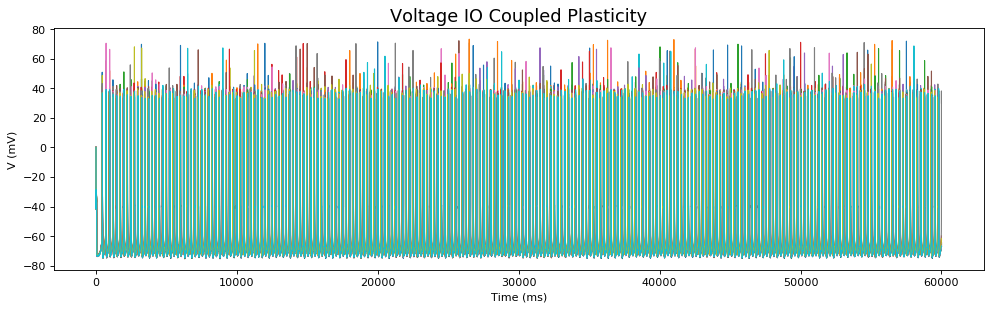

Number of spikes DCN: 1988
Number of spikes DCN: 2537
Number of spikes DCN: 2086
Number of spikes DCN: 2117
Number of spikes DCN: 2027
Number of spikes DCN: 1888
Number of spikes DCN: 2377
Number of spikes DCN: 2216
Number of spikes DCN: 2057
Number of spikes DCN: 2270


WARNING    C:\Users\thoed\Anaconda3\envs\brian\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
 [py.warnings]


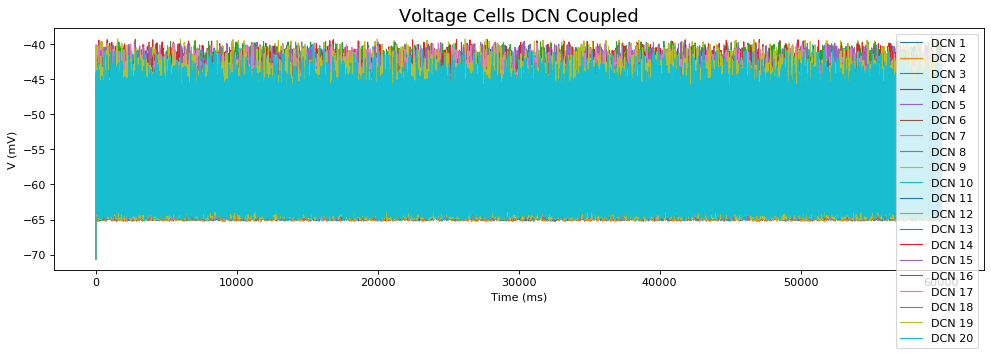

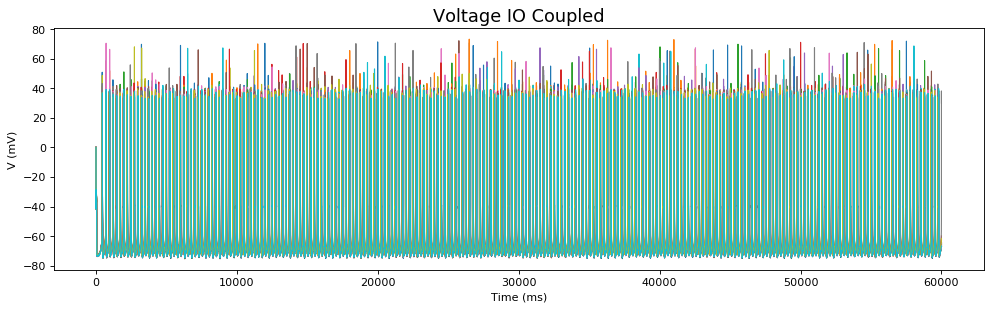

WARNING    C:\Users\thoed\Anaconda3\envs\brian\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
 [py.warnings]


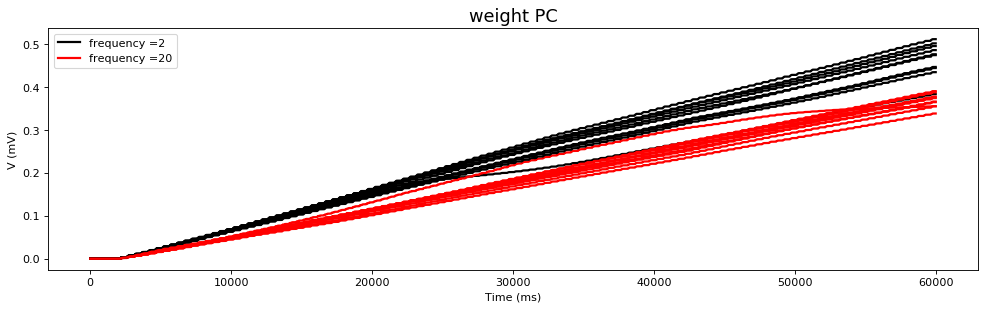

WARNING    C:\Users\thoed\Anaconda3\envs\brian\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
 [py.warnings]


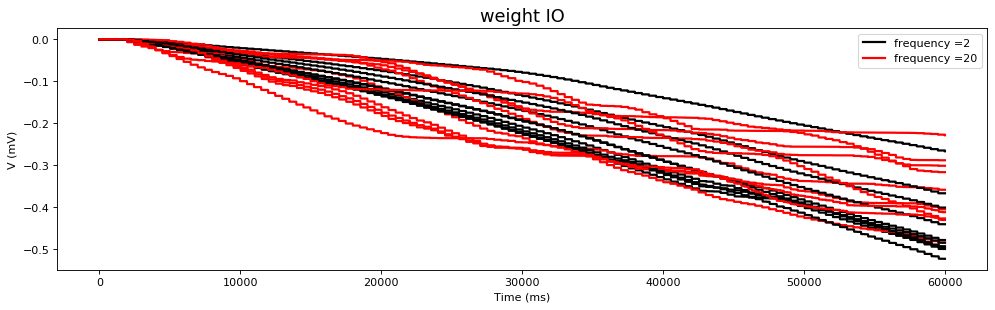

WARNING    C:\Users\thoed\Anaconda3\envs\brian\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
 [py.warnings]


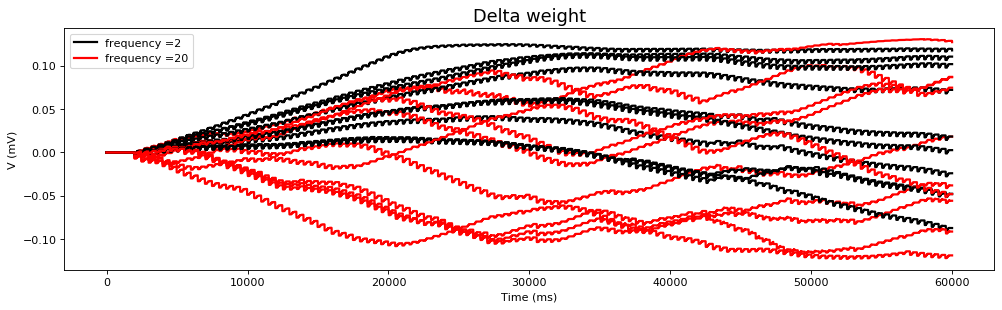

WARNING    C:\Users\thoed\Anaconda3\envs\brian\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
 [py.warnings]


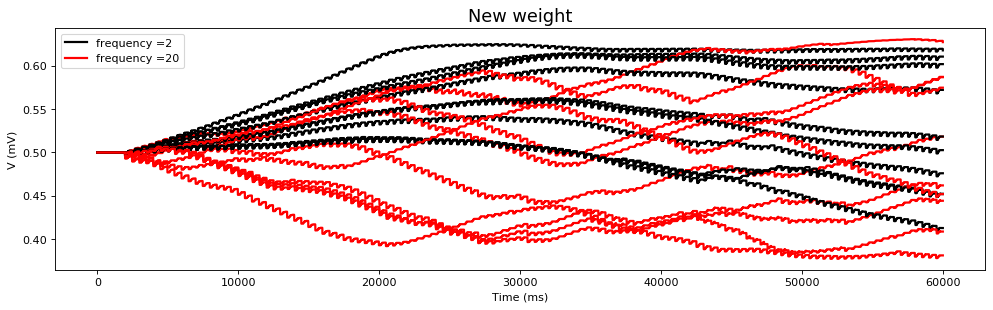

Plasticity Uncoupled Scenario


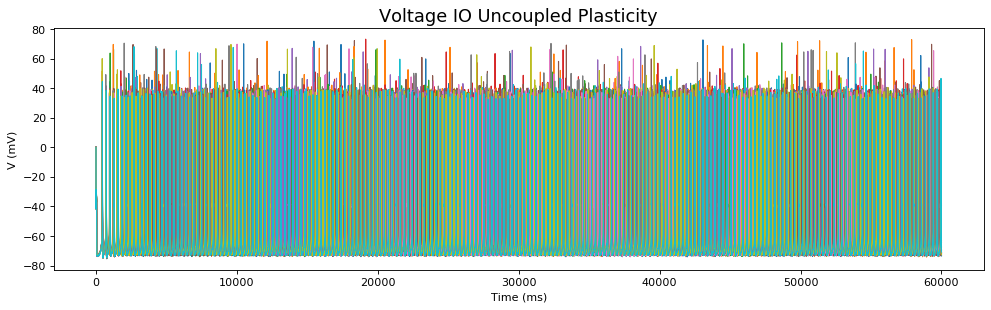

Number of spikes DCN: 1925
Number of spikes DCN: 2295
Number of spikes DCN: 2006
Number of spikes DCN: 2013
Number of spikes DCN: 1921
Number of spikes DCN: 1820
Number of spikes DCN: 2217
Number of spikes DCN: 2183
Number of spikes DCN: 1982
Number of spikes DCN: 1954


WARNING    C:\Users\thoed\Anaconda3\envs\brian\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
 [py.warnings]


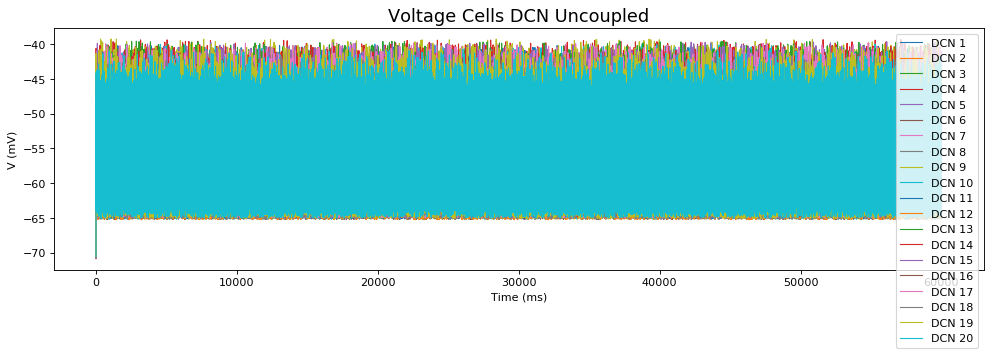

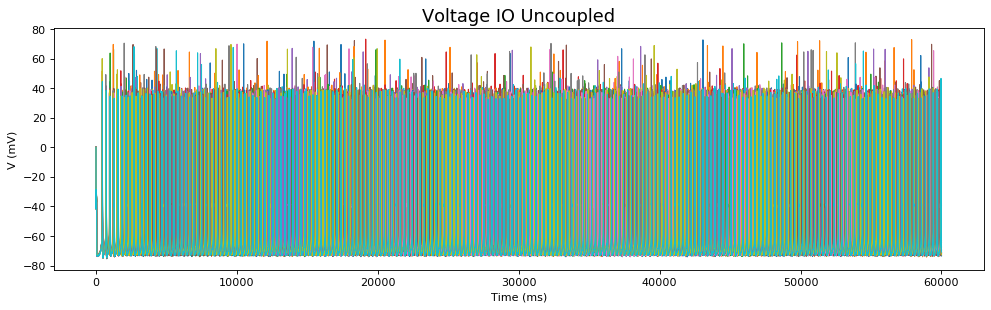

<Figure size 1200x320 with 0 Axes>

WARNING    C:\Users\thoed\Anaconda3\envs\brian\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
 [py.warnings]


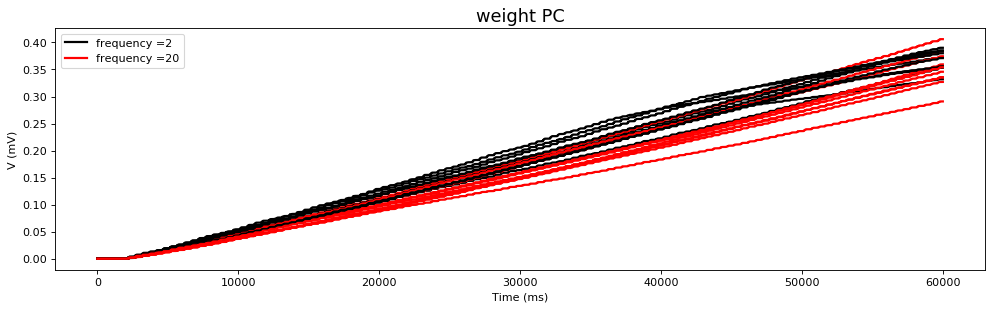

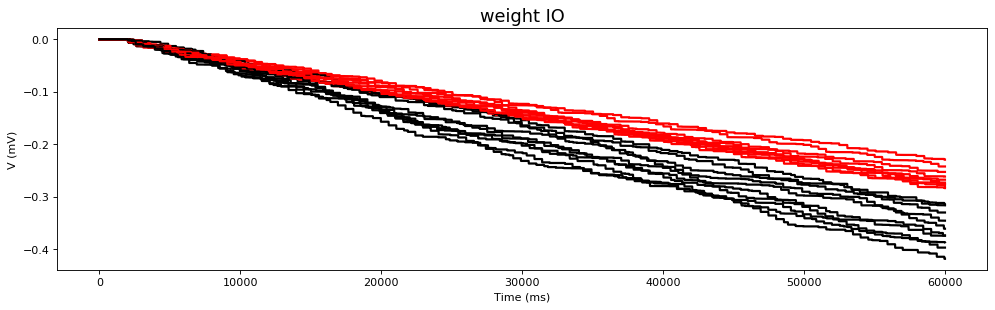

WARNING    C:\Users\thoed\Anaconda3\envs\brian\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
 [py.warnings]


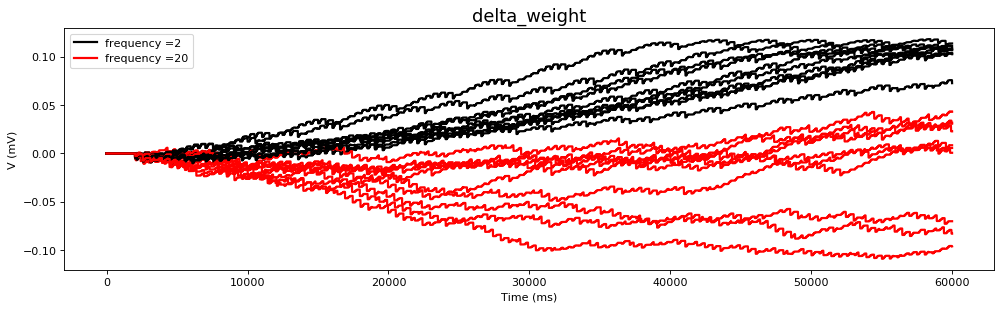

WARNING    C:\Users\thoed\Anaconda3\envs\brian\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
 [py.warnings]


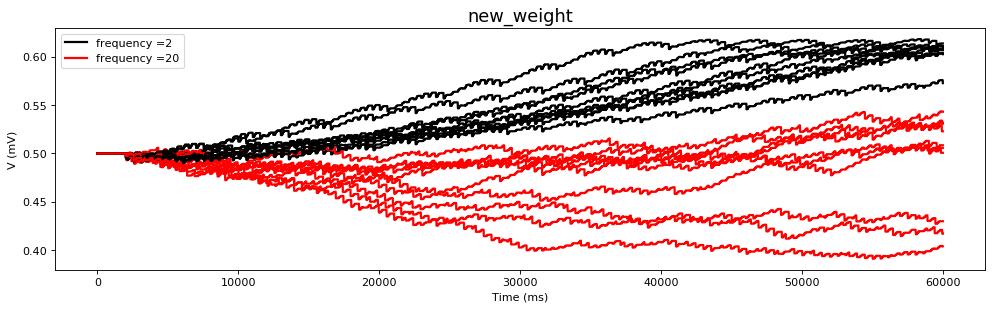

In [7]:
from G_Plot_Plasticity import *

In [8]:
#from F_save_data_Plasticity import *

In [9]:
from F_save_data_Plasticity import *

Plasticity variables are saved
Inputs are saved
Voltage Cells are saved
Spike Times are saved
population rates saved


In [10]:
%matplotlib notebook
#print(y)
y_post = np.append(np.zeros(1000),np.ones(59000))
print(y_post)
print(mon_N_PC_Uncoupled.w_IO_uncoupled)
x=np.linspace(0,len(y_post),len(y_post))
print(x)
plt.figure()
#plt.title('distribution uncoupled')
for k in range(1,2):
    plt.plot(mon_N_PC_Uncoupled.f_lt_PC_uncoupled[k],color='red')
    plt.plot(mon_N_PC_Uncoupled.f_st_PC_uncoupled[k],color='black')
    #plt.scatter(x,mon_N_PC_Coupled.freq_dep[k])
    #plt.scatter(x,mon_N_PC_Uncoupled.freq_dep[k])
    #plt.plot(mon_N_PC_Coupled.f_st_PC_coupled[k],color='black')
    
#plt.legend(['w io coupled', 'w pc coupled'])
plt.show()
plt.figure()
#plt.title('distribution uncoupled')
for k in range(1,20):
    #plt.plot(mon_N_PC_Uncoupled.f_lt_PC_uncoupled[k],color='red')
    #plt.plot(mon_N_PC_Uncoupled.f_st_PC_uncoupled[k],color='black')
    #plt.plot(mon_N_PC_Coupled.w_IO[k],color='red')
    #plt.plot(mon_N_PC_Coupled.w_PC[k],color='black')
    
    plt.plot(mon_N_PC_Uncoupled.w_IO_uncoupled[k],color='green')
    plt.plot(mon_N_PC_Uncoupled.w_PC_uncoupled[k],color='blue')
plt.legend(['w pc unc', 'w io unc'])
plt.figure()
plt.title('variable that compares short- and long term')
for k in range(0,1):
    #plt.plot(mon_N_PC_Uncoupled.f_lt_PC_uncoupled[k],color='red')
    #plt.plot(mon_N_PC_Uncoupled.f_st_PC_uncoupled[k],color='black')
    
    y= y_post*(mon_N_PC_Uncoupled.f_st_PC_uncoupled[k]/((y_post-1)+mon_N_PC_Uncoupled.f_lt_PC_uncoupled[k]))
    yw= y_post*(mon_N_PC_Coupled.f_lt_PC_coupled[k]/((y_post-1)+mon_N_PC_Coupled.f_st_PC_coupled[k]))

    y = np.floor(y)
    yw = np.floor(yw)
    #plt.plot(y,color='blue',linestyle='-')
    plt.plot(yw,color='black',linestyle='-')
plt.xlabel('time [ms]')
plt.ylabel('0 if short<long, 1 if short>long')
plt.show()
#plt.title('distribution uncoupled')
plt.figure()
for k in range(0,20):
    #plt.plot(mon_N_PC_Uncoupled.f_lt_PC_uncoupled[k],color='red')
    #plt.plot(mon_N_PC_Uncoupled.f_st_PC_uncoupled[k],color='black')
    #plt.plot(mon_N_PC_Coupled.freq_dep[k],color='red')
    #plt.plot(mon_N_PC_Coupled.weight_IO[k],color='black')
    #plt.plot(mon_N_PC_Coupled.weight_PC[k],color='red')
    plt.plot(mon_N_PC_Uncoupled.max_LTD_IO_uncoupled[k],color='red')

    plt.plot(mon_N_PC_Coupled.max_LTD_IO_coupled[k],color='green')

#plt.legend(['long term', 'short term'])
plt.figure()
plt.plot(mon_N_PC_Coupled.weight_IO[k],color='black')
plt.plot(mon_N_PC_Coupled.weight_PC[k],color='red')
plt.show()
print(sum(yw)/len(y_post))
print(len(mon_N_PC_Coupled.input_dep))


[0. 0. 0. ... 1. 1. 1.]
[[0.         0.         0.         ... 1.         1.         1.        ]
 [0.         0.         0.         ... 1.         1.         1.        ]
 [0.         0.         0.         ... 1.         1.         1.        ]
 ...
 [0.         0.         0.         ... 1.         1.         1.        ]
 [0.         0.         0.         ... 0.99911278 0.99911278 0.99911278]
 [0.         0.         0.         ... 1.         1.         1.        ]]
[0.00000000e+00 1.00001667e+00 2.00003333e+00 ... 5.99980000e+04
 5.99990000e+04 6.00000000e+04]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.5925166666666667
20


In [11]:
from F_save_data_Plasticity import *

In [12]:
plt.figure()
#plt.title('distribution uncoupled')
for k in range(0,10):
    plt.plot(mon_N_PC_Uncoupled.f_lt_PC_uncoupled[k],color='red')
    plt.plot(mon_N_PC_Coupled.f_lt_PC_coupled[k],color='black')
plt.xlabel('time [ms]')
plt.ylabel('frequency [Hz]')
plt.show()
plt.figure()
#plt.title('distribution uncoupled')
for k in range(0,10):
    plt.plot(mon_N_PC_Uncoupled.mean_freq_IO_uncoupled[k],color='red')
    plt.plot(mon_N_PC_Coupled.mean_freq_IO_coupled[k],color='black')
plt.xlabel('time [ms]')
plt.ylabel('frequency [Hz]')
plt.show()
plt.figure()
#plt.title('distribution uncoupled')
for k in range(0,10):
    plt.plot(mon_N_PC_Uncoupled.max_LTD_IO_uncoupled[k],color='red')
    plt.plot(mon_N_PC_Coupled.max_LTD_IO_coupled[k],color='black')
plt.xlabel('time [ms]')
plt.ylabel('frequency [Hz]')
plt.show()
plt.figure()
plt.title('PC moving average')
for k in range(0,1):
    plt.plot(mon_N_PC_Coupled.y[k],color='red')
    #plt.plot(mon_N_PC_Coupled.f_st_PC[k],color='black')
plt.xlabel('time [ms]')
plt.ylabel('frequency [Hz]')
plt.show()
plt.figure()
plt.title('IO moving average')
for p in range(0,n_IO):
    plt.plot(mon_N_PC_Coupled.f_lt_IO[p],color='red')
    plt.plot(mon_N_PC_Coupled.f_st_IO[p], color='black')
plt.legend(['long term','short term'])
plt.xlabel('time [ms]')
plt.ylabel('frequency [Hz]')

plt.figure()
plt.title('Difference in moving average IO (short term - long term)')
#for p in range(0,n_IO):
#    difio=mon_N_PC_Coupled.f_st_IO[p]-mon_N_PC_Coupled.f_lt_IO[p]
#    idxio = (difio>0).astype(float)
#    procentage_LTD = sum(idxio)/1000
#    print('depression %',procentage_LTD)
#    plt.plot(mon_N_PC_Coupled.f_st_IO[p]-mon_N_PC_Coupled.f_lt_IO[p])
#plt.figure()
for p in range(0,10):
    difio=mon_N_PC_Coupled.f_st_IO[p]-mon_N_PC_Coupled.f_lt_IO[p]

    dif=mon_N_PC_Coupled.f_st_PC[p]-mon_N_PC_Coupled.f_lt_PC[p]
    idx = (dif>0).astype(float)
    #plt.plot(idx)
    #plt.ylim([0,1.1])
    procentage_LTP = sum(idx)/1000
    plt.plot(dif)
    plt.plot(difio)
    print('potentiated %',procentage_LTP)
print(mon_N_PC_Coupled.f_lt_IO.shape)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

AttributeError: No attribute with name mean_freq_IO_uncoupled

In [ ]:
print(np.floor(-0.1))